# STEP 1 Get expression matrix

In [62]:
setwd('/rds/general/user/jj1419/ephemeral/epilepsy/interneuron_network_10%')

#load package
library(Seurat) #read in seurat object
library(pheatmap) #heatmap

Warning message:
“package ‘pheatmap’ was built under R version 3.6.3”

In [16]:
#-------step 1 read in seurat, create expression matrix-------
#load rds file
epi=readRDS(file='seurat_samples.rds') #expression matrix
epi_ano=readRDS(file='annotations_inf_zeizal_remClust.rds')
epi$cluster_ano=epi_ano

#extract expression matrix
epi_expr=GetAssayData(object = epi, assay= "RNA", slot = "data")
epi_exprMat=as(Class = 'matrix', object = epi_expr)

#assign patient and control
patient=epi@meta.data$orig.ident
#which(patient=='P44'), to 21640
patient_group=rep(NA,times=39384)
for (i in 1:21640)
{patient_group[i]='disease'}
for (i in 21641:39384)
{patient_group[i]='control'}
epi$disease=patient_group


#seperate disease and control interneurons
cell_filter_A=which(epi@meta.data$disease=='disease' & epi@meta.data$cluster_ano==celltype)
cell_filter_B=which(epi@meta.data$disease=='control' & epi@meta.data$cluster_ano==celltype)

#filter DEGs
deg_file='SigGenes_int.csv'
deg=read.table(file=deg_file,header=T,sep=',')
deg_name=as.character(deg[,2])

#filtered expression matrix
epi_filter_disease=epi_exprMat[deg_name,cell_filter_A]
epi_filter_control=epi_exprMat[deg_name,cell_filter_B]
dim(epi_filter_disease)
dim(epi_filter_control)

[1]  735 1588

[1]  735 1753

# STEP 2 Cluster - hierarchical

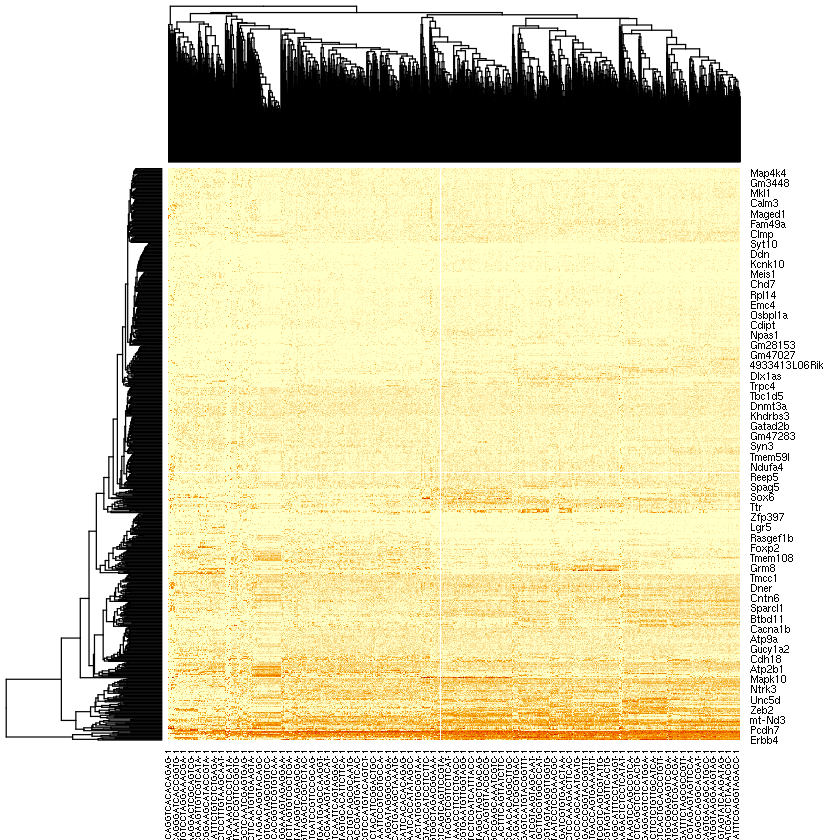

In [20]:
#-------step 2 cluster-------
heatmap(epi_filter_disease, scale = "none")

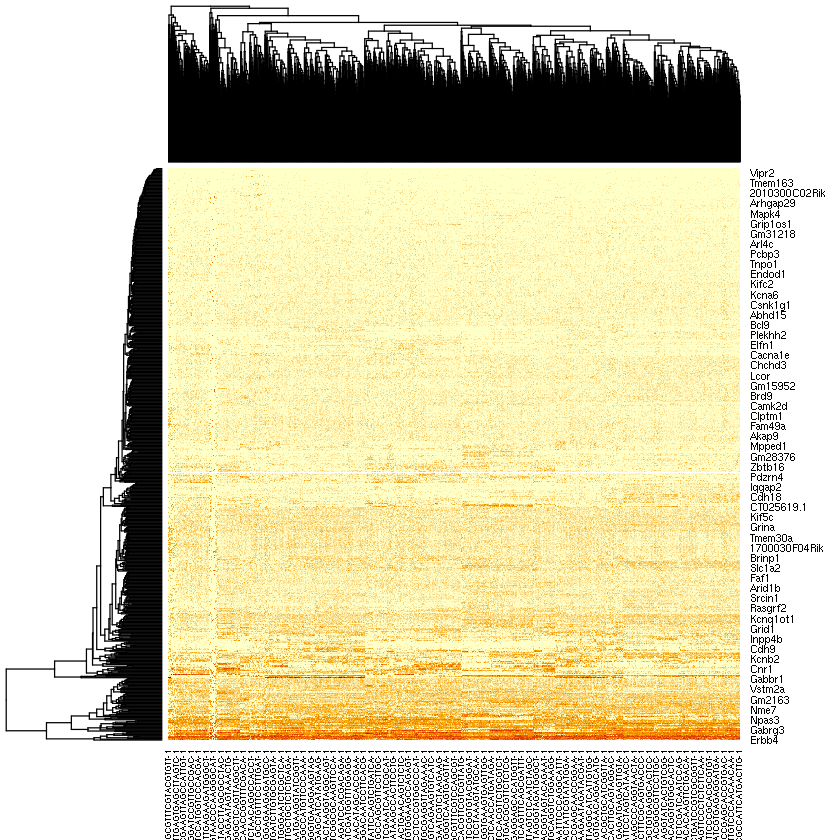

In [21]:
heatmap(epi_filter_control, scale = "none")

# STEP 2 Cluster - dimensionality reduction

In [29]:
ControlSample1.data= CreateSeuratObject(counts=epi_filter_disease)
ControlSample1=FindVariableFeatures(ControlSample1.data, selection.method = "vst", nfeatures = 2000)
tibia.combined=ScaleData(ControlSample1, verbose = FALSE)
tibia.combined=RunPCA(tibia.combined, npcs = 30, verbose = FALSE)
tibia.combined=RunUMAP(tibia.combined, reduction = "pca", dims = 1:20)
tibia.combined=FindNeighbors(tibia.combined, reduction = "pca", dims = 1:20)
tibia.combined=FindClusters(tibia.combined, resolution = 0.5)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1588
Number of edges: 49967

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9168
Number of communities: 13
Elapsed time: 0 seconds


In [63]:
#get clusters of interneurons based on the expression of DEGs
cell_matrix=matrix(ncol=1,nrow=length(colnames(epi_filter_disease)))
cell_matrix[,1]=tibia.combined@meta.data$seurat_clusters          
colnames(cell_matrix)=c('cluster_name')
rownames(cell_matrix)=colnames(epi_filter_disease)
cell_name_aftercluster=names(sort(cell_matrix[,1]))

#matrix for heatmap
heat_matrix=epi_filter_disease[,cell_name_aftercluster]
heat_matrix[1:5,1:5]

,P1_TGCTCCACATCGTGCG-1,P1_AGCCAATGTGCGTTTA-1,P1_CCGCAAGCAGAGGGTT-1,P5_CCACTTGCATCCAATG-1,P5_GAATCGTTCAACTGGT-1
AY036118,1.899149,2.288355,1.986770,2.379528,2.904100
mt-Co3,4.276702,4.353826,4.390714,3.728081,3.736858
Maf,0.000000,0.000000,0.000000,0.000000,0.000000
Nrg3os,1.345499,2.288355,2.877991,0.000000,0.000000
mt-Nd3,2.514499,2.757761,1.986770,2.240692,3.116224


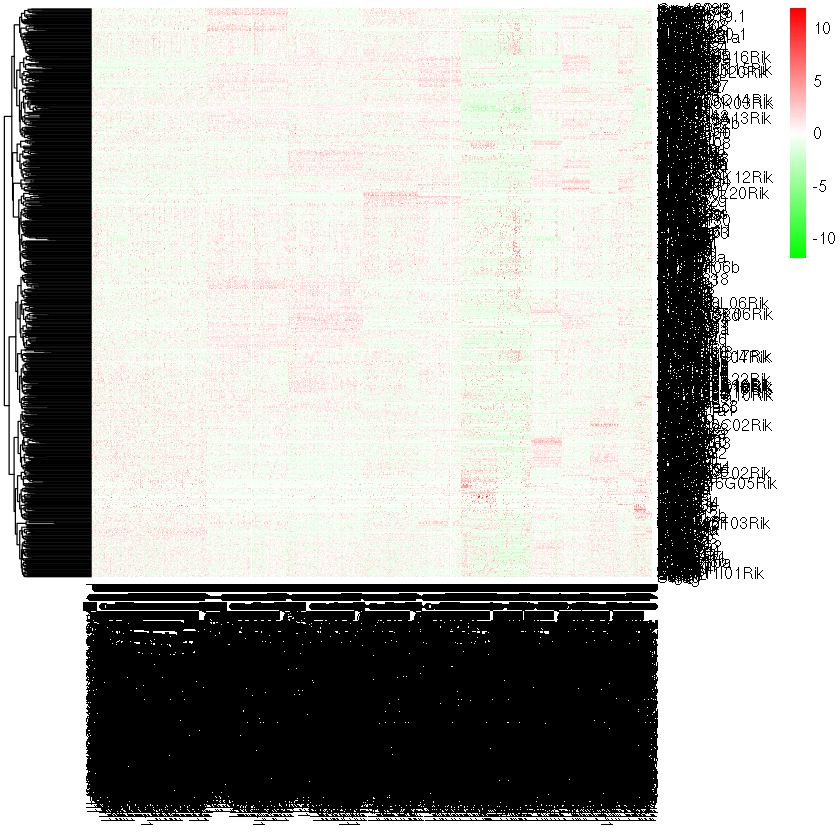

In [89]:
pheatmap(heat_matrix, 
            scale="row", 
            #clustering_method="average",
            cluster_rows=TRUE,
            cluster_cols=FALSE, 
            color=colorRampPalette(c("green", "white","red"))(100), 
            #annotation_col=as.data.frame(as.numeric(sort(cell_matrix[,1]))),
            #annotation_row=anno_row, 
            #annotation_names_row=FALSE, 
            #annotation_names_col=TRUE, 
            show_colnames=FALSE,
            show_rownames=TRUE,
            #annotation_colors=ano_col, 
            )

In [82]:
ano_col=c()
col=c('Indigo','SteelBlue','Lavender','Blue','SeaGreen','LightGreen','OliverDrab','Orange','Chocolate','Salmon',
     'Aqua','Gold','Cornislk')
for (i in 1:13)
{
    ano_col=append(ano_col,rep(col[i],length(which(cell_matrix[,1]==i))))
}    
ano_col=as.data.frame(ano_col)

In [85]:
as.data.frame(as.numeric(sort(cell_matrix[,1])))

"as.numeric(sort(cell_matrix[, 1]))"
1
1
1
1
1
1
1
1
1
1
